<a href="https://colab.research.google.com/github/Reyqq/learning/blob/main/%D0%91%D1%83%D1%81%D1%82%D0%B8%D0%BD%D0%B3%D0%B8/%D0%90%D0%BD%D1%81%D0%B0%D0%BC%D0%B1%D0%BB%D0%B8_%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ансамблевые методы в машинном обучении

**Ансамбль (ensemble) в машинном обучении** — метод машинного обучения, где несколько моделей обучаются для решения одной и той же проблемы и объединяются для получения лучших результатов называется ансамблевым методом. Основная предпосылка заключается в том, что результат работы нескольких моделей будет более точен, чем результат только одной модели.

Когда говорится об ансамблях, то вводится понятие слабого ученика(обычные модели вроде линейной регрессии или дерева решений). Множество слабых учеников являются строительными блоками для более сложных моделей. Объединение слабых учеников для улучшения качества модели, уменьшения смещения или разброса, называется сильным учеником.

# Для чего нужен ансамбль?
1. **Улучшение точности:** Ансамблевые методы часто дают более точные предсказания по сравнению с отдельными моделями. Это связано с тем, что ошибки разных моделей могут компенсировать друг друга.
2. **Уменьшение дисперсии:** Они помогают уменьшить дисперсию модели, что снижает риск переобучения.
3. **Устойчивость:** Ансамбли менее чувствительны к отдельным ошибкам или шуму в данных, так как объединяют результаты нескольких моделей.

# Зачем применяется ансамбль?

Ансамбли применяются для улучшения производительности моделей в различных задачах машинного обучения, таких как классификация, регрессия и кластеризация. Они особенно полезны, когда:
- Одна модель не может достичь необходимой точности.
- Необходимо уменьшить риск переобучения.
- Данные содержат шум или выбросы.

# Виды ансамблевых методов
Наиболее популярными ансамблевыми методами являются: **стекинг(stacking)**, **бэггинг(bagging)**, **бустинг(boosting)**.
- **Cтекинг(stacking)**. Используется несколько разнородных слабых учеников. Их обучают и объединяют для построения прогноза, основанного на результатах различных слабых моделей.

- **Бэггинг(bagging)**. В этом случае однородные модели обучают на разных наборах данных и объединяют. Получают прогноз путём усреднения. Если использовать в качестве слабого ученика деревья решений, то получится случайный лес **RandomForestClassifier / RandomForestRegressor**.

- **Бустинг(boosting)**. При использовании данного метода несколько однородных моделей последовательно обучаются, исправляя ошибки друг друга.

# Cтекинг(stacking)

Это мощный ансамблевый метод, который позволяет объединить предсказания нескольких моделей для получения более точных и надёжных результатов.

Основная идея стекинга состоит в том, чтобы обучить несколько моделей, обычно с разными типами алгоритмов (также называемых базовыми моделями или базовыми учениками), на одном и том же наборе тренировочных данных. Затем вместо того, чтобы выбирать лучшую модель, предсказания всех базовых моделей агрегируются с использованием другой модели (мета-модели или мета-ученика) для получения окончательного прогноза. Входные данные для мета-модели — это результаты предсказаний базовых моделей.

 Правильное применение стекинга требует тщательного выбора базовых моделей и мета-модели, а также настройки параметров для каждой модели.

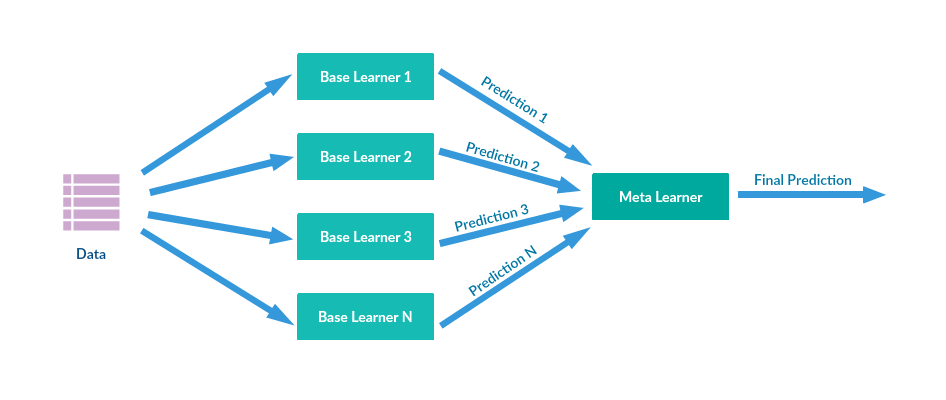

# Преимущества данного метода:

- Он может использовать алгоритмы разного типа, а не только из какого-то фиксированного семейства. Например, в качестве базовых алгоритмов могут выступать метод ближайших соседей и линейная регрессия.

- Результаты базовых алгоритмов объединяются в один с помощью обучаемой мета-модели, а не с помощью какого-либо обычного способа агрегации (суммирования или усреднения)

- **Улучшение точности:** Стекинг часто улучшает точность моделей, так как использует преимущества различных алгоритмов.

- **Снижение переобучения:** Мета-модель помогает уменьшить риск переобучения, комбинируя предсказания базовых моделей.

- **Гибкость:** Можно использовать различные алгоритмы и модели в качестве базовых, что делает стекинг очень гибким подходом.

# Обучение стекинга проходит в несколько этапов:

1. Общая выборка разделяется на тренировочную и тестовую.
2. Тренировочная выборка делится на фолдов. Затем эти фолды перебираются тем же способом, что используется при кросс-валидации: на каждом шаге фиксируются $(n-1)$ фолдов для обучения базовых алгоритмов и один — для их предсказаний (вычисления мета-факторов). Такой подход нужен для того, чтобы можно было использовать всё тренировочное множество, и при этом базовые алгоритмы не переобучались.

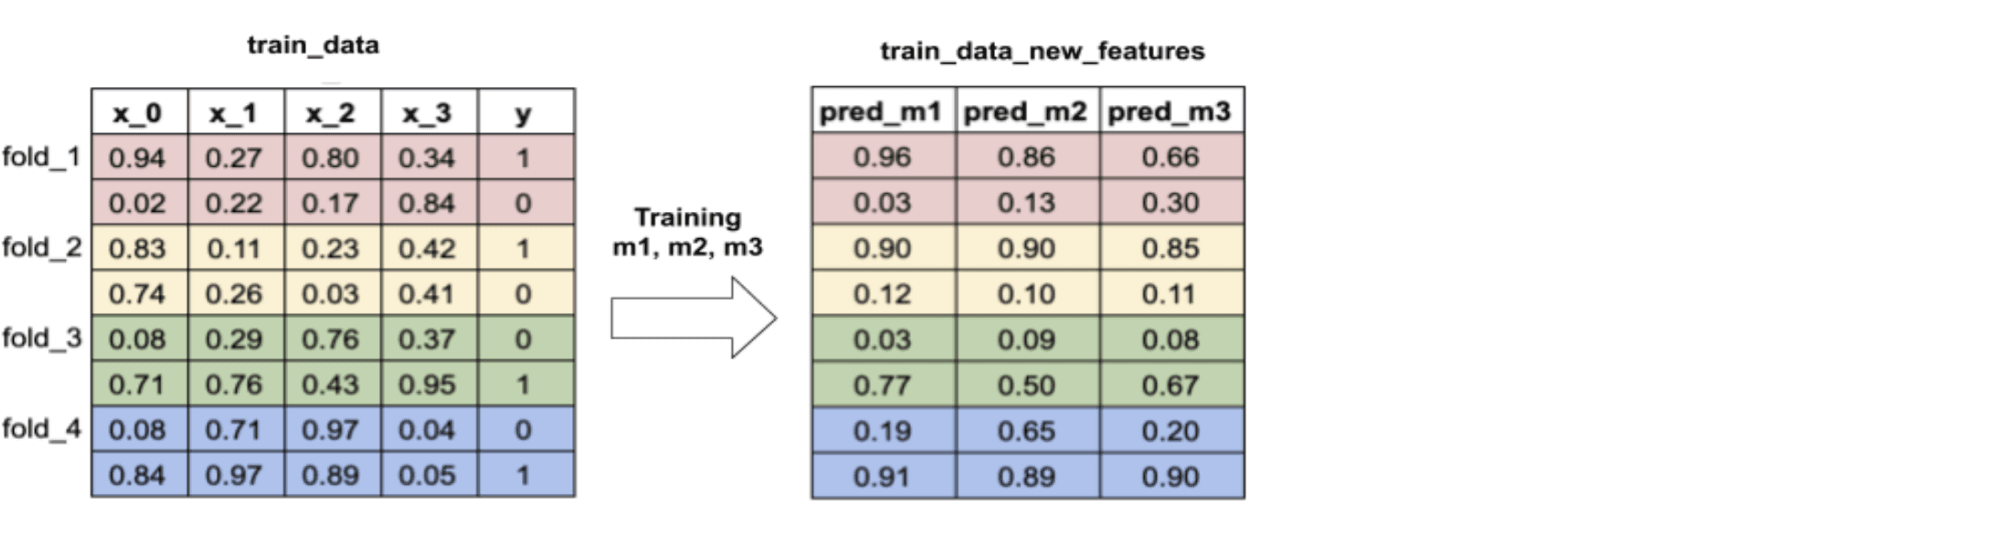

3. На полученных мета-факторах обучается мета-модель. Кроме мета-факторов, она может принимать на вход и фичи из исходного датасета. Выбор зависит от решаемой задачи.

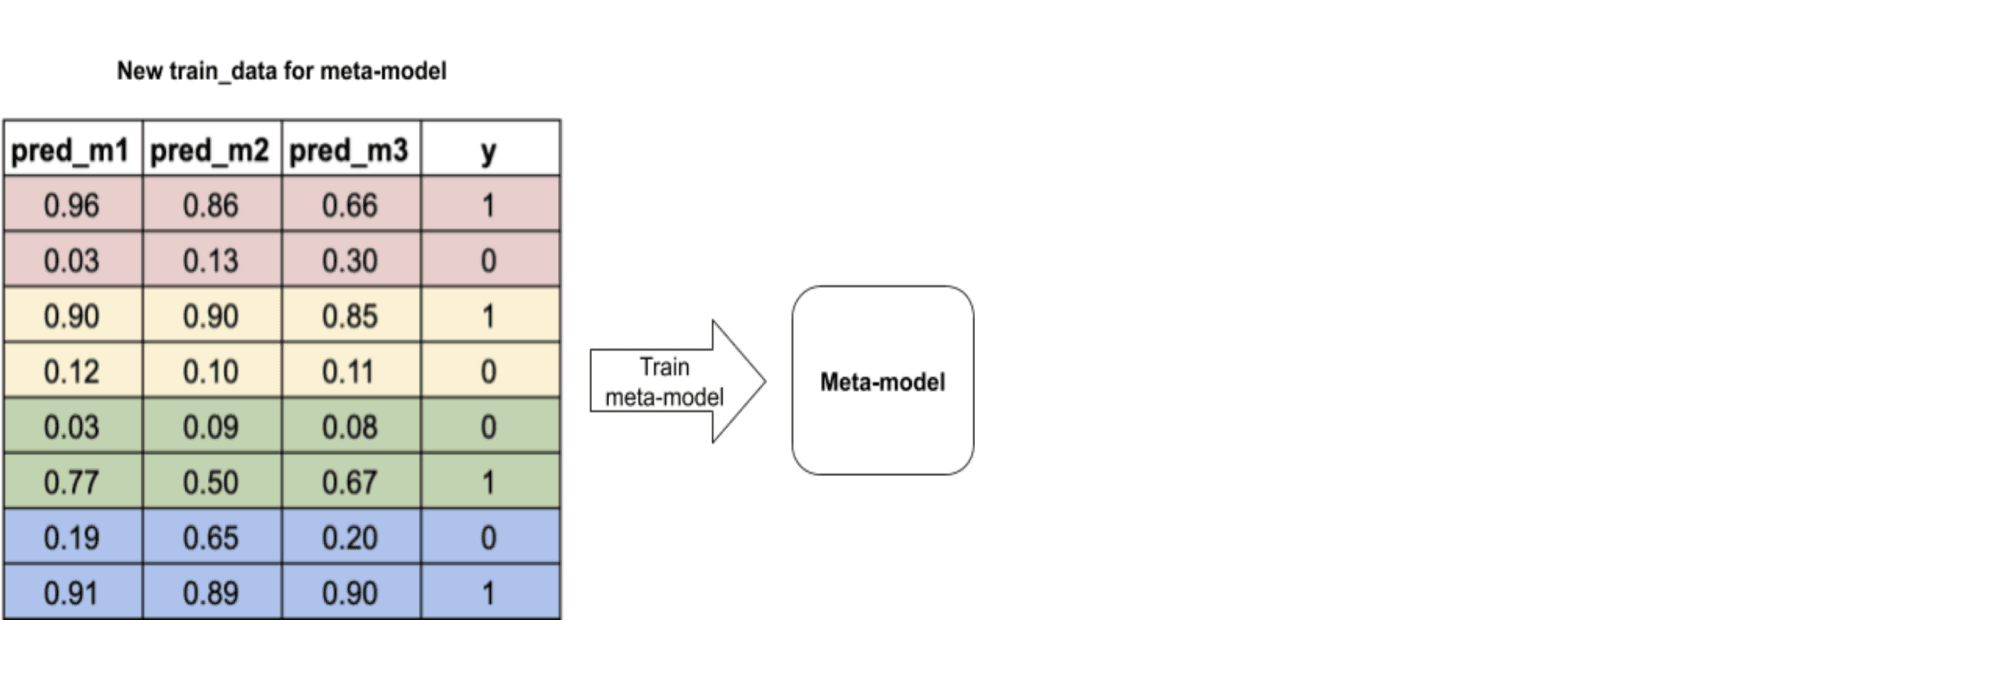

Для получения мета-факторов на тестовом множестве базовые алгоритмы можно обучить на всём тренировочном множестве — переобучения в данном случае возникнуть не должно.

Если данных достаточно много, то можно просто разделить обучающие данные на две непересекающиеся части: ту, на которой учатся базовые алгоритмы, и ту, на которой они делают свои предсказания и обучается мета-модель. Использование такого простого разбиения вместо кросс-валидации на тренировочных данных иногда называют **блендингом (blending)**. Если данных совсем много, то тестовое множество тоже можно разделить на две части: тестовую и валидационную, и использовать последнюю для подбора гиперпараметров моделей-участников.

# Заключение
Стекинг не минимизирует смещение и разброс напрямую. Вместо этого он фокусируется на уменьшении общей ошибки модели за счёт оптимального комбинирования предсказаний различных базовых моделей. Уменьшение общей ошибки, в свою очередь, приводит к снижению смещения и разброса, но не является прямой целью процесса стекинга.


# Бэггинг(bagging)

Основная идея **бэггинга(bagging, от слова "bootstrap aggregating")** заключается в снижении разброса модели и увеличении ее устойчивости за счет комбинирования предсказаний нескольких моделей, обученных на разных подвыборках исходного тренировочного множества.

# Принцип работы бэггинга

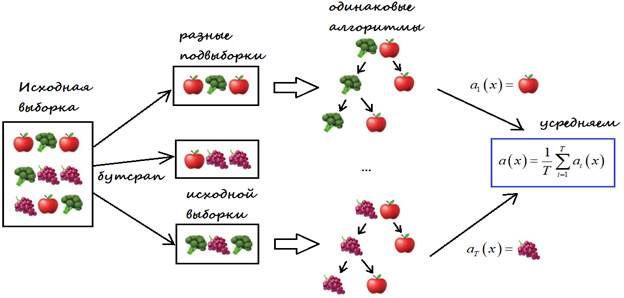

1. Создание подвыборок с повторением(bootstrap samples):
  - Из исходного тренировочного множества многократно случайным образом выбираются подвыборки с повторением. Это значит, что некоторые образцы могут попасть в одну подвыборку несколько раз, а некоторые могут не попасть вовсе.
2. Обучение моделей:
  - На каждой из этих подвыборок обучается своя модель. Важно, что все модели одного типа(например, все деревья решений), но обучены они на различных данных.
3. Агрегация предсказаний:
  - Для получения финального предсказания все модели делают предсказания для одного и того же наблюдения.
  - В случае регрессии предсказания усредняются.
  - В случае классификации используется голосование большинства (выбирается класс, который был предсказан наибольшим количеством моделей).

Наверное, здесь сразу возникает вопрос, зачем нам искусственно создавать несколько независимых алгоритмов, а потом усреднять их выходы?

Одна известная история гласит, как в 1906 году математик Фрэнсис Гальтон посетил рынок и увидел, как продавец быка предложил покупателям небольшую лотерею: угадать точный вес этого быка, который весил 1198 фунтов. От крестьян посыпались самые разные предположения. Но ни один не назвал точное значение. Однако, усреднив все ответы, получилось значение 1197 – очень близкое к истинному. Вот так **«мудрость толпы»** решила эту непростую задачу.

Эта же идея заложена в бэггинге, когда мы формируем множество независимых алгоритмов, каждый выдает свой вариант ответа, а затем, мы его усредняем, чтобы получить более точное значение.

Этот эффект уменьшения ошибки при усреднении ответов легко объяснить с позиции теории вероятностей. Предположим, что верное значение – вес быка – это величина \\( \theta \\). Тогда ответы крестьян можно представить в виде следующей аддитивной модели:

  \\( y_i = \theta + \epsilon_i \\)

где \\( y_i \\) — ответ \\( i \\)-го крестьянина;

\\( \theta \\) — истинное значение веса быка;

\\( \epsilon_i \\) — случайная ошибка с нулевым математическим ожиданием и дисперсией \\( \sigma^2 \\).

# Усреднение ответов
- Если мы усредним ответы всех крестьян, то получим:
  - \\( \bar{y} = \frac{1}{n} \sum_{i=1}^n y_i \\)

- Подставим \\( y_i = \theta + \epsilon_i \\):

  - \\( \bar{y} = \frac{1}{n} \sum_{i=1}^n (\theta + \epsilon_i) \\)

- Разложим сумму:
  - \\( \bar{y} = \theta + \frac{1}{n} \sum_{i=1}^n \epsilon_i \\)

# Ожидание и дисперсия усреднённого ответа

1. **Математическое ожидание:**

 - \\( \mathbb{E}[\bar{y}] = \mathbb{E}\left[\theta + \frac{1}{n} \sum_{i=1}^n \epsilon_i \right] = \theta + \frac{1}{n} \sum_{i=1}^n \mathbb{E}[\epsilon_i] = \theta + \frac{1}{n} \sum_{i=1}^n 0 = \theta \\)

Это означает, что усреднённый ответ является несмещённым оценивателем истинного значения \\( \theta \\).

2. **Дисперсия:**
 - \\( \mathrm{Var}(\bar{y}) = \mathrm{Var}\left(\theta + \frac{1}{n} \sum_{i=1}^n \epsilon_i \right) = \mathrm{Var}\left(\frac{1}{n} \sum_{i=1}^n \epsilon_i \right) = \frac{1}{n^2} \sum_{i=1}^n \mathrm{Var}(\epsilon_i) = \frac{1}{n^2} \sum_{i=1}^n \sigma^2 = \frac{\sigma^2}{n} \\)

Это показывает, что дисперсия усреднённого ответа уменьшается с увеличением числа крестьян \\( n \\).

То есть, дисперсия \\( \sigma^2 \\) одного отдельного ответа (алгоритма) после усреднения всех результатов, уменьшается в \\( n \\) раз. Это означает, что итоговая величина становится точнее \\( n \\) независимых ответов каждого алгоритма.

Обратите внимание, на важность **независимых** ответов. Если ответы (предположения о весе быка) будут зависеть друг от друга, то простое усреднение станет уже не лучшим подходом, а в ряде случаев может даже ухудшить отдельные результаты. Поэтому независимость работы алгоритмов при бэггинге является ключевым условием.

# Вывод

Таким образом, при усреднении ответов крестьян мы получаем более точную оценку истинного значения веса быка \\( \theta \\) с меньшей дисперсией. Это и есть основной эффект бэггинга в машинном обучении: комбинирование нескольких моделей (или предсказаний) позволяет уменьшить дисперсию ошибки, что приводит к более стабильной и точной модели.

Этот принцип лежит в основе того, почему бэггинг работает хорошо: он уменьшает разброс предсказаний ансамбля моделей по сравнению с отдельными моделями, улучшая обобщающую способность и точность конечного предсказания.

# Бутстрэп (bootstrap)
Так как же нам сформировать \\( n \\) независимых алгоритмов, используя всего одну обучающую выборку? Здесь есть несколько идей, но в бэггинге используется очень простой подход, который носит название **бутстрэп(bootstrap)**.

Суть бутстрэпа заключается в формировании \\( n \\) новых обучающих выборок на основе одной исходной:
- $X = \{x_1, x_2, \ldots, x_n\}$, где  \\( x_n \\) - число выборок.


Для этого случайным образом выбирается \\( k \\)-й элемент  выборки и копируется в новую (в прежней он остается, не удаляется). Затем, эта операция повторяется \\( t \\) раз – по заданному размеру новой выборки. Так формируется новая обучающая выборка, состоящая из элементов исходной с некоторыми повторениями, так как вполне можно несколько раз случайно отобрать один и тот же элемент. После формирования одной выборки, переходят к формированию следующей и так \\( n \\) раз для \\( n \\) выборок, которые, очевидно, будут несколько отличаться друг от друга. Это идея бутстрэпа.
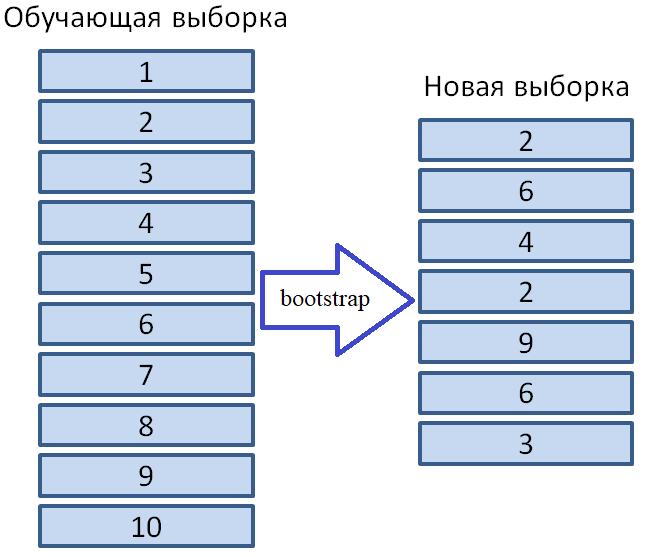


Можно сказать, что формируя, таким образом, новую обучающую выборку длиной \\( l \\), она будет использовать в среднем $ (1 - \frac{1}{e}) \times 100\% \approx 63.2\% $  образов из исходной выборки (остальные будут повторяться).

Это значит, что оставшуюся часть выборки в $ 36.8\%$ можно использовать в качестве отложенной для проверки качества алгоритма.

# Бэггинг с решающими деревьями. Случайный лес
Собственно, само слово bagging произошло от сокращения двух английских слов: **bootstrap aggregation**. Итак, имея \\( n\\) случайных выборок длиной \\( m\\) элементов, мы можем по ним получить \\( n\\) алгоритмов (классификации или регрессии).


Здесь есть один важный нюанс: алгоритмы в своей совокупности должны охватывать как можно больше возможных исходов для каждого входного вектора \\( x\\) и, кроме того, формировать как можно более независимые ответы. В этом смысле обычные линейные модели не очень пригодны при композиции (в частности, при усреднении ответов). Гораздо лучшие результаты дают решающие деревья, построенные независимо на каждой сформированной обучающей выборке (на этапе бустрэпа).

Как ни странно, приверженность деревьев к переобучению играет положительную роль. Они, во-первых, получаются довольно разнообразными и, во-вторых, описывают самые разные исходы для входных векторов \\( x\\). Затем, при усреднении результатов, эффект переобучения естественным образом нивелируется (уменьшается) и итоговое выходное значение оказывается достаточно точным и устойчивым к отдельным выбросам. В ряде задач точность оказывается выше всех других подходов машинного обучения. Именно поэтому бутстрэп быстро завоевал свою популярность.

# Реализация случайного леса на Python
Вот идея бэггинга с применением случайного леса. Для ее реализации на языке **Python** в библиотеке **Scikit-Learn** имеются два класса:
 - **RandomForestClassifier** – случайный лес для задач классификации;
 - **RandomForestRegressor** – случайный лес для задач регрессии.

У каждого класса есть следующий набор основных параметров:
 - **n_estimators** – число используемых деревьев;
 - **criterion** – критерий разбиения выборки в промежуточных вершинах;
 - **max_features** – число признаков, по которым ищется разбиение;
 - **min_samples_leaf** – минимальное число объектов в листе;
 - **max_depth** – максимальная глубина дерева.


 Ниже представлены результаты аппроксимации функции косинуса с небольшим гауссовским шумом случайными деревьями: $y(x) = \cos(x) + n(x)$


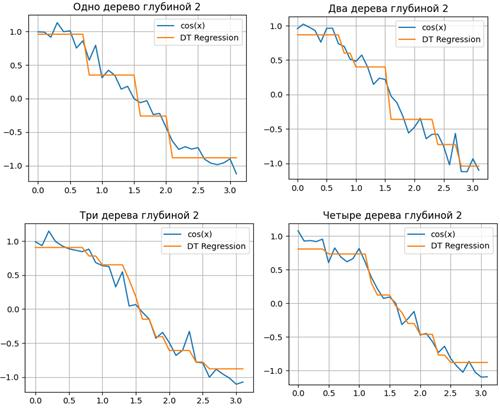

Как мы видим, при увеличении числа деревьев одной и той же глубины, повышается точность описания исходной функции. Это пример реализации бэггинга на случаных деревьях.

# Преимущества и недостатки случайного леса

 К преимуществам можно отнести:
  - Имеет высокую точность прогнозов (на большинстве задач работает лучше линейных алгоритмов); точность сравнима с точностью бустинга;
  - Практически не чувствителен к выбросам в данных из-за случайного сэмлирования выборок методом бутсрэпа;
  - Не требует тщательной настройки параметров, хорошо работает «из коробки»;
  - Способен эффективно обрабатывать данные с большим числом признаков и классов;
  - Редко переобучается, на практике добавление деревьев почти всегда только улучшает композицию (до определенного, предельного уровня);
  - Хорошо работает с пропущенными данными; сохраняет хорошую точность, если большая часть данных пропущена;
  - Легко распараллеливать и масштабировать (увеличивать число деревьев и их глубину).
  - Хорошо работает с пропущенными данными; сохраняет хорошую точность, если большая часть данных пропущена;

Недостатки случайного леса:
  - Cлучайный лес не умеет экстраполировать, в отличие от той же линейной регрессии;
  - Алгоритм склонен к переобучению на некоторых задачах, особенно на сильно зашумленных данных;
  - больший размер получающихся моделей. Требуется $O(N*K)$ памяти для хранения модели, где \\( K\\) – число деревьев.
  - В отличие от одного дерева, результаты случайного леса сложнее интерпретировать;

# Бустинг

**Бустинг(boosting)** — это ансамблевый метод, в котором так же, как и в методе выше, строится множество базовых алгоритмов из одного семейства, объединяющихся затем в более сильную модель. Отличие состоит в том, что в бэггинге и случайном лесе базовые алгоритмы учатся независимо и параллельно, а в бустинге — последовательно.

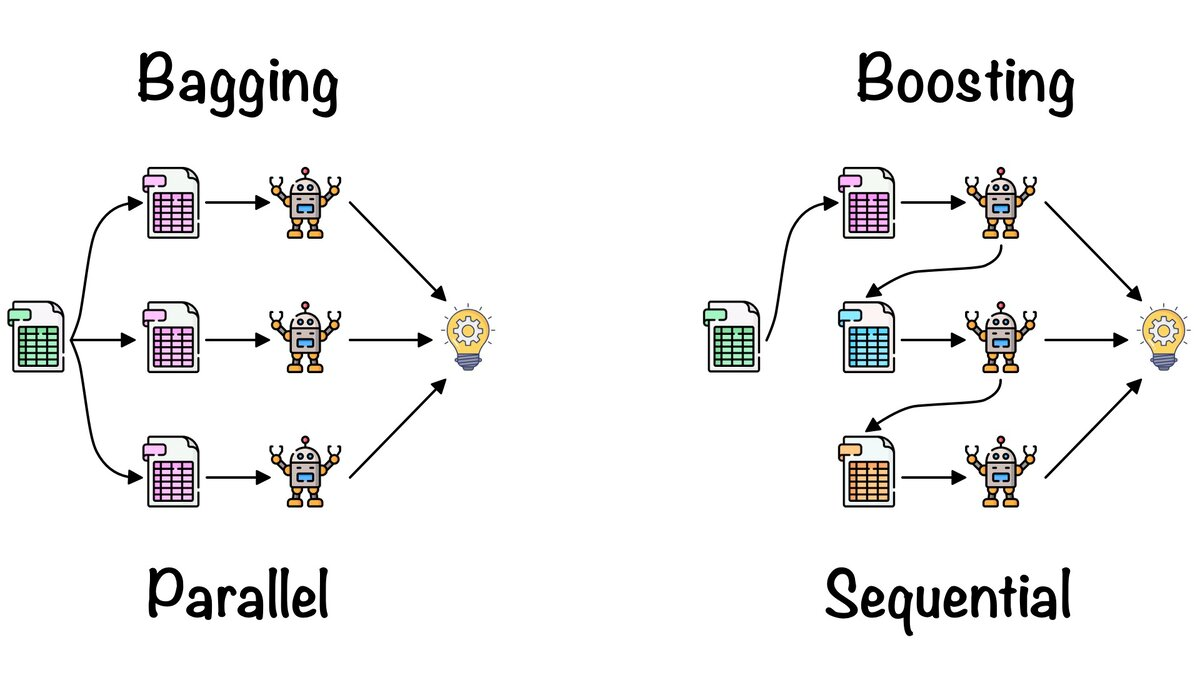

Метод бустинга в чём то схож с методом бэггинга: берётся множество одинаковых моделей и объединяется, чтобы получить сильного ученика. Но разница заключается в том, что модели приспосабливаются к данным последовательно, то есть каждая модель будет исправлять ошибки предыдущей.

Базовые модели для бустинга - это модели с низким разбросом и высоким смещением. Например неглубокие деревья решений. Одна из причин такого выбора моделей - они требуют меньше вычислительных затрат. Ещё бустинг (в отличии от бэггинга) нельзя распараллелить.

Поскольку основная цель бустинга — уменьшение смещения, в качестве базовых алгоритмов часто выбирают алгоритмы с высоким смещением и небольшим разбросом. Например, если в качестве базовых классификаторов выступают деревья, то их глубина должна быть небольшой — обычно не больше 2-3 уровней.

Ещё одной важной причиной для выбора моделей с высоким смещением в качестве базовых является то, что такие модели, как правило, быстрее учатся. Это важно для их последовательного обучения, которое может стать очень дорогим по времени, если на каждой итерации будет учиться сложная модель. На текущий момент основным видом бустинга с точки зрения применения на практике является **градиентный бустинг**.

Хотя случайный лес — мощный и достаточно простой для понимания и реализации алгоритм, на практике он чаще всего уступает градиентному бустингу. Поэтому градиентный бустинг сейчас — основное продакшн-решение, если работа происходит с табличными данными (в работе с однородными данными — картинками, текстами — доминируют нейросети).